## Create Word2Vec Model

---

In [1]:
# from createWord2VecModel import createW2VModel

# createW2VModel(models = ["skipgram", "cbow"])

---

## Visualize Words

---

### Skip-gram

---

In [2]:
from word2vec.Word2Vec import studentFeedbackWord2Vec

w2v_skipgram = studentFeedbackWord2Vec()
w2v_skipgram.load("word2vec/skipgram_model.bin")
w2v_skipgram.most_similar("giảng viên")

[('giáo viên', 0.7961173057556152),
 ('thầy giáo', 0.6603303551673889),
 ('thầy', 0.6395307183265686),
 ('lịch sự', 0.6110140085220337),
 ('cô', 0.6044704914093018),
 ('hết lòng', 0.6004809141159058),
 ('cẩn thận', 0.5924038887023926),
 ('đều đặn', 0.5840983986854553),
 ('kỹ lưỡng', 0.5753787159919739),
 ('hăng say', 0.5736873149871826)]

In [3]:
import pickle
with open("utils/words_dict.pkl", "rb") as file:
    words = pickle.load(file)
words

{'thầy': array([-0.06999846,  0.01738616,  0.07625765,  0.1569164 ,  0.08659946,
        -0.23986138,  0.0536634 ,  0.24901426, -0.30775356, -0.07948752,
        -0.13974182, -0.05709023,  0.07677955,  0.3979063 , -0.10088373,
         0.02879314,  0.02414979,  0.08358436, -0.24191774, -0.3264114 ,
         0.37228283,  0.01529222,  0.03588011,  0.20748547,  0.17560387,
        -0.09530006, -0.0786647 , -0.03222314, -0.18987988, -0.08947279,
        -0.09956846,  0.20182943,  0.20007108, -0.11915435, -0.04753587,
        -0.04926389,  0.1969632 , -0.2063555 , -0.09783924, -0.08714931,
        -0.00801328,  0.02575613, -0.14495416, -0.27844855,  0.02715842,
        -0.15868033, -0.05457999, -0.1673646 ,  0.26231807,  0.23950532,
        -0.19631283, -0.2554366 , -0.16747156,  0.18075746,  0.27917334,
        -0.05551292, -0.08380012, -0.15150645, -0.13797739,  0.09113462,
        -0.02154154, -0.13783559, -0.10886549, -0.2513448 , -0.50091356,
         0.17568435, -0.16564082,  0.324592

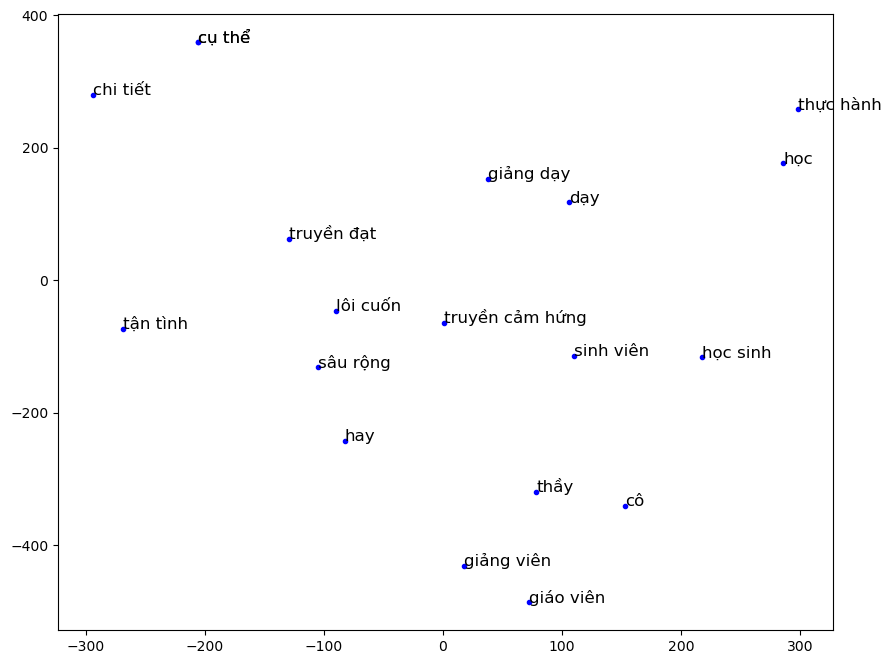

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Chọn các từ bạn muốn vẽ
selected_words = ["thầy","giảng viên", "giáo viên", "cô",
                  "học", "thực hành", 
                  "giảng dạy", "dạy", "truyền đạt", 
                  "sinh viên", "học sinh", 
                  "lôi cuốn", "truyền cảm hứng", "hay", "sâu rộng", 
                  "chi tiết", "tận tình", "cụ thể", "cụ thể"]

# Lấy vector của các từ từ mô hình
vectors = np.array([w2v_skipgram.get_vector(word) for word in selected_words])

# Giảm chiều dữ liệu về 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, perplexity=5 ,random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.', color='b')

# Hiển thị tên của các từ
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)

plt.show()

In [5]:
print(w2v_skipgram.get_vectors().shape)
w2v_skipgram.get_vectors()

(1417, 200)


array([[-0.06999846,  0.01738616,  0.07625765, ..., -0.13496086,
        -0.32864907,  0.04504812],
       [-0.06319322, -0.11086356, -0.22311804, ..., -0.27447897,
         0.04968915, -0.04957581],
       [ 0.09250087,  0.09543615, -0.04298763, ..., -0.27389285,
         0.15466587, -0.09806242],
       ...,
       [ 0.08734204, -0.0371408 , -0.05605735, ..., -0.13211888,
         0.08088096, -0.09598753],
       [-0.0295964 , -0.16139153,  0.07612254, ..., -0.2673467 ,
        -0.0628435 ,  0.00175544],
       [ 0.06970941,  0.0062299 , -0.03256002, ..., -0.06889631,
        -0.00192125, -0.07397635]], dtype=float32)

---

## Processing

---

In [6]:
from underthesea import word_tokenize
from utils.preprocessing import remove_punctuation

def tokenize_vietnamese_sentence(sentence):
    return word_tokenize(remove_punctuation(sentence.lower()))

def sent2vec(message, word_dict = words):
    tokens = tokenize_vietnamese_sentence(message)
    vectors = []
    
    for token in tokens:
        if token not in word_dict.keys():
            continue
        token_vector = word_dict[token]
        vectors.append(token_vector)
    return np.array(vectors, dtype=float)

In [7]:
sent2vec("thầy dạy tốt.").shape

(3, 200)

In [8]:
import pandas as pd
train_df = pd.read_csv("Data/train.csv")
dev_df   = pd.read_csv("Data/dev.csv")
test_df  = pd.read_csv("Data/test.csv")

X_train, y_train = train_df["sents"], train_df["sentiments"]
X_dev, y_dev = dev_df["sents"], dev_df["sentiments"]
X_test, y_test = test_df["sents"], test_df["sentiments"]

In [9]:
len(train_df), len(dev_df), len(test_df)

(11426, 1583, 3166)

In [10]:
def df_to_X_y(dataframe):
    y = dataframe["sentiments"].to_numpy().astype(int)
    
    all_word_vector_sequences = []
    
    for message in dataframe["sents"]:
      message_as_vector_seq = sent2vec(message)
      if message_as_vector_seq.shape[0] == 0:
        message_as_vector_seq = np.zeros(shape=(1, 200))

      all_word_vector_sequences.append(message_as_vector_seq)
    
    return all_word_vector_sequences, y

In [11]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train), len(X_train[0]))

11426 3


In [12]:
print(len(X_train), len(X_train[2]))

11426 5


(array([8.174e+03, 2.439e+03, 5.870e+02, 1.460e+02, 5.000e+01, 2.100e+01,
        5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <BarContainer object of 10 artists>)

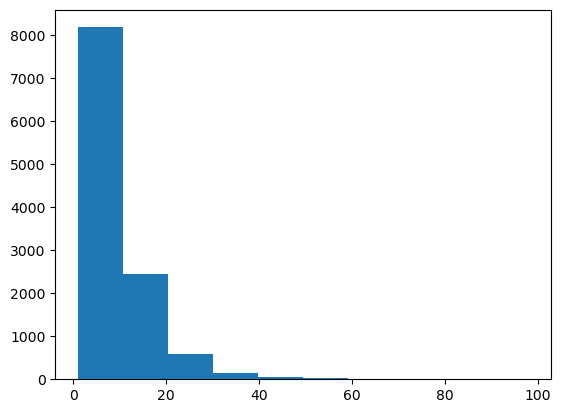

In [13]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [14]:
pd.Series(sequence_lengths).describe()

count    11426.000000
mean         9.224313
std          7.202322
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         98.000000
dtype: float64

In [15]:
from copy import deepcopy

# Create sequences padding for X
def pad_sequences(X, desired_sequence_length=205):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len
    
    pad = np.zeros(shape=(sequence_length_difference, 200))

    X_copy[i] = np.concatenate([x, pad])
  
  return np.array(X_copy).astype(float)

In [16]:
X_train = pad_sequences(X_train)

X_train.shape

(11426, 205, 200)

In [17]:
y_train.shape

(11426,)

In [18]:
X_val, y_val = df_to_X_y(dev_df)
X_val = pad_sequences(X_val)

X_val.shape, y_val.shape

((1583, 205, 200), (1583,))

In [19]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_sequences(X_test)

X_test.shape, y_test.shape

((3166, 205, 200), (3166,))

---

## Classification Report

---

In [20]:
from keras.models import load_model

# Assuming you have trained and saved your model as follows
# model.save("models/lstm_model.h5")

# Now, to load the model for later use
loaded_model = load_model("models/lstm_model.keras")

# You can now use the loaded_model for predictions or further training

In [21]:
test_predictions = (loaded_model.predict(X_test))

99/99 [==============================] - 8s 78ms/step


In [22]:
test_predictions

array([[6.0639720e-02, 9.3267626e-01, 6.6839773e-03],
       [1.3310155e-04, 1.5717640e-07, 9.9986672e-01],
       [1.0478409e-03, 3.4112400e-05, 9.9891806e-01],
       ...,
       [1.0204375e-03, 1.2682542e-06, 9.9897838e-01],
       [4.9579662e-01, 1.3284430e-01, 3.7135908e-01],
       [9.8958659e-01, 1.5357566e-04, 1.0259798e-02]], dtype=float32)

In [23]:
# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

print(predicted_labels)

[1 2 2 ... 2 0 0]


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

print("Report: \n",classification_report(y_test,predicted_labels))
print("Confusion Matrix: \n",confusion_matrix(y_test,predicted_labels))
print("Precision: ",precision_score(y_test,predicted_labels,average="weighted"))
print("Recall: ",recall_score(y_test,predicted_labels,average="weighted"))
print("F1-Score: ",f1_score(y_test,predicted_labels,average="weighted"))
print("Accuracy: ",accuracy_score(y_test,predicted_labels))

Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1409
           1       0.42      0.48      0.45       167
           2       0.93      0.92      0.92      1590

    accuracy                           0.90      3166
   macro avg       0.76      0.77      0.77      3166
weighted avg       0.90      0.90      0.90      3166

Confusion Matrix: 
 [[1301   48   60]
 [  41   80   46]
 [  70   62 1458]]
Precision:  0.9004388745515286
Recall:  0.8967150979153506
F1-Score:  0.8984464339563112
Accuracy:  0.8967150979153506


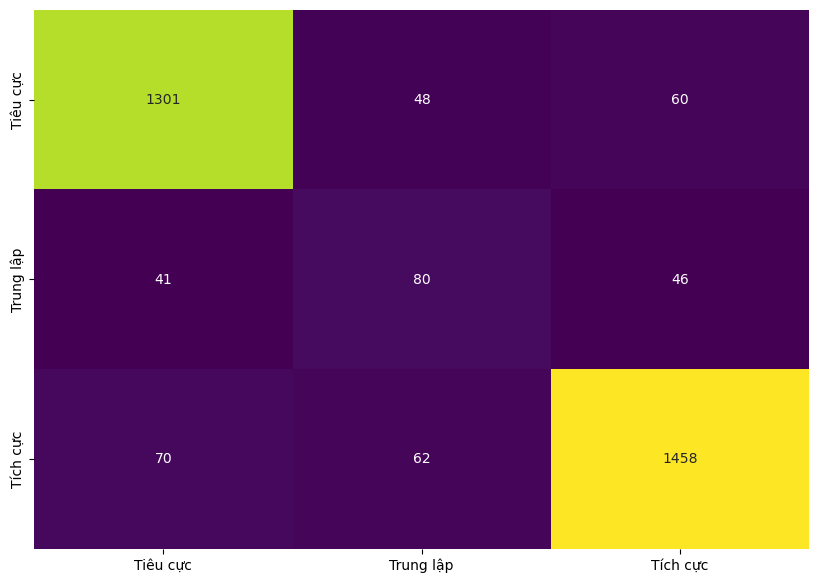

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test,predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True, fmt="d",cmap="viridis", cbar=False,
                 xticklabels=["Tiêu cực", "Trung lập", "Tích cực"], yticklabels=["Tiêu cực", "Trung lập", "Tích cực"])
plt.show()

---

## Prediction

---

In [26]:
desired_sequence_length = 205

In [27]:
from keras.models import load_model
lstm_model = load_model("models/lstm_model.keras")

In [28]:
sentence = "Thầy giảng bài hay, cho ít bài tập"
def pad_sequence_sentence(sentence):
    array = sent2vec(sentence)
    arr_seq_len = array.shape[0]
    sequence_length_difference = desired_sequence_length - arr_seq_len
        
    pad = np.zeros(shape=(sequence_length_difference, 200))

    array = np.array(np.concatenate([array, pad]))
    array = np.expand_dims(array, axis=0)
    return array.astype(float)
array = pad_sequence_sentence(sentence)
array.shape

(1, 205, 200)

In [29]:
from utils.classify import feedbackSentimentAnalysis

prediction = np.argmax(lstm_model.predict(array) > 0.5)
sentiment = feedbackSentimentAnalysis(prediction)
print("Sentiment: ", sentiment)

1/1 [==============================] - 1s 631ms/step
Sentiment:  Tích Cực
